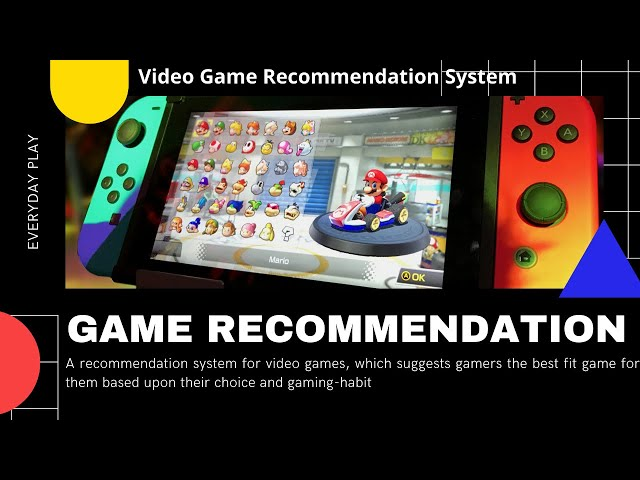

In [1]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/Gamee.jpg",height=500,width=900))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df=pd.read_csv("/content/imdb-videogames.csv")
df

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,NaN,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True


In [4]:
# printing the first 5 rows of the dataframe
df.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [5]:
df.tail()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,NaN,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True
20802,20802,Cryptic,https://www.imdb.com/title/tt10964974/?ref_=ad...,2020.0,NaN,NaN,NaN,Kidnapped by an insane man and dragged into a ...,False,False,False,False,False,False,False,False,True


In [6]:
# number of rows and columns in the data frame

print("column count: ",df.shape[1])
print("Row count: ",df.shape[0])

column count:  17
Row count:  20803


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20803 non-null  int64  
 1   name         20803 non-null  object 
 2   url          20803 non-null  object 
 3   year         20536 non-null  float64
 4   certificate  7903 non-null   object 
 5   rating       11600 non-null  float64
 6   votes        11600 non-null  object 
 7   plot         20803 non-null  object 
 8   Action       20803 non-null  bool   
 9   Adventure    20803 non-null  bool   
 10  Comedy       20803 non-null  bool   
 11  Crime        20803 non-null  bool   
 12  Family       20803 non-null  bool   
 13  Fantasy      20803 non-null  bool   
 14  Mystery      20803 non-null  bool   
 15  Sci-Fi       20803 non-null  bool   
 16  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Unnamed: 0,year,rating
count,20803.000000,20536.000000,11600.000000
mean,10401.000000,2005.568611,7.047526
std,6005.453161,11.846028,1.235204
min,0.000000,1952.000000,1.000000
25%,5200.500000,1997.000000,6.400000
50%,10401.000000,2008.000000,7.200000
75%,15601.500000,2016.000000,7.900000
max,20802.000000,2027.000000,9.700000


In [9]:
df.isna().sum()

Unnamed: 0         0
name               0
url                0
year             267
certificate    12900
rating          9203
votes           9203
plot               0
Action             0
Adventure          0
Comedy             0
Crime              0
Family             0
Fantasy            0
Mystery            0
Sci-Fi             0
Thriller           0
dtype: int64

In [10]:
# selecting the relevant features for recommendation

selected_features = ['name','plot']
print(selected_features)

['name', 'plot']


In [11]:
# replacing the null valuess with null string

for feature in selected_features:
   df[feature] = df[feature].fillna('')

In [12]:
# combining all the 5 selected features

combined_features = df['name'].astype(str) + ' ' + df['plot'].astype(str)

In [13]:
print(combined_features)

0        Spider-Man When a new villain threatens New Yo...
1        Red Dead Redemption II Amidst the decline of t...
2        Grand Theft Auto V Three very different crimin...
3        God of War After wiping out the gods of Mount ...
4        Uncharted 4: A Thief's End Thrown back into th...
                               ...                        
20798       Enjoy Your Power, Enjoy Your Choice Add a Plot
20799    RedSun2020 Joseph gets kidnapped and it's the ...
20800    Shutter A tech support man who uses a drone to...
20801    The Music Machine A young teenage girl and the...
20802    Cryptic Kidnapped by an insane man and dragged...
Length: 20803, dtype: object


In [14]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [15]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [16]:
print(feature_vectors)

  (0, 10930)	0.23179267203849457
  (0, 2764)	0.13837953355923863
  (0, 27140)	0.11902530893937044
  (0, 21604)	0.18075478991146177
  (0, 17088)	0.10785663284408674
  (0, 15212)	0.22875986134419576
  (0, 11575)	0.2405865853009789
  (0, 25854)	0.19483218497060192
  (0, 25771)	0.04609517218170487
  (0, 22328)	0.13038033110427183
  (0, 26057)	0.06081700514066137
  (0, 5182)	0.23343798145711905
  (0, 28460)	0.17056945642246274
  (0, 1445)	0.17303110284211604
  (0, 18773)	0.23343798145711905
  (0, 19098)	0.21434500546446603
  (0, 4914)	0.26735300416634844
  (0, 28791)	0.1845210180714907
  (0, 25871)	0.206064054479722
  (0, 27603)	0.20809678668224266
  (0, 17527)	0.2256255957596419
  (0, 28140)	0.13310025743199577
  (0, 15605)	0.27073084109113327
  (0, 24133)	0.3879196862241577
  (1, 14882)	0.13903993029516587
  :	:
  (20802, 6039)	0.2641356481344499
  (20802, 7590)	0.28578201982067963
  (20802, 12868)	0.23881101670821675
  (20802, 17730)	0.23254424886679106
  (20802, 1261)	0.1887818859215565

cosine similarity

In [17]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [18]:
print(similarity.shape)

(20803, 20803)


In [19]:
# getting the game name from the user

game_name = input(' Enter game name : ')

 Enter game name : Shutter


In [20]:
# creating a list with all the game names given in the dataset

list_of_all_games = df['name'].tolist()
print(list_of_all_games)

['Spider-Man', 'Red Dead Redemption II', 'Grand Theft Auto V', 'God of War', "Uncharted 4: A Thief's End", 'The Last of Us: Part II', 'Horizon Forbidden West', 'The Last of Us', 'Detroit: Become Human', 'Death Stranding', 'Ghost of Tsushima', 'Spider-Man: Miles Morales', 'Cyberpunk 2077', "Uncharted: Drake's Fortune", 'Batman: Arkham Knight', 'God of War: Ragnarök', 'Far Cry 6', 'Grand Theft Auto: San Andreas', 'MultiVersus', 'Far Cry 3', 'Star Wars Jedi: Fallen Order', 'Elden Ring', 'Xenoblade Chronicles 3', 'Uncharted: The Nathan Drake Collection', "Assassin's Creed Valhalla", "Marvel's Guardians of the Galaxy", 'Grand Theft Auto: Vice City', 'Uncharted 2: Among Thieves', 'The Witcher 3: Wild Hunt', 'Fallout: New Vegas', 'Command & Conquer: Red Alert 3', 'Horizon Zero Dawn', 'Red Dead Redemption', 'Call of Duty: Modern Warfare', 'Final Fantasy VII Remake', 'Genshin Impact', 'The Elder Scrolls V: Skyrim', 'Fallout 4', 'Yakuza: Like a Dragon', 'Days Gone', 'Squadron 42', 'Grand Theft A

In [21]:
# finding the close match for the game name given by the user

find_close_match = difflib.get_close_matches(game_name, list_of_all_games)
print(find_close_match)

['Shutter', 'Shatter', 'Spatter']


In [22]:
close_match = find_close_match[0]
print(close_match)

Shutter


In [23]:
# finding the index of the game with name

id_of_the_games = df[df.name == close_match]['Unnamed: 0'].values[0]
print(id_of_the_games)

20800


In [24]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[id_of_the_games]))
print(similarity_score)

[(0, 0.05062837903862734), (1, 0.04136006850121173), (2, 0.01276010144558815), (3, 0.01955218303335046), (4, 0.014116229039369124), (5, 0.016096140061633225), (6, 0.0085066629036926), (7, 0.01266595699100245), (8, 0.037321255527805984), (9, 0.003171260940209041), (10, 0.013775445978359894), (11, 0.0555389304422019), (12, 0.0), (13, 0.00795474617087842), (14, 0.013940463655630468), (15, 0.004976539047188017), (16, 0.008157371669007074), (17, 0.011602673546194904), (18, 0.0), (19, 0.0), (20, 0.0079559976629838), (21, 0.02064298467238043), (22, 0.003245501106526977), (23, 0.0028111413409145727), (24, 0.007320127603253161), (25, 0.0073276851371763705), (26, 0.003397819945034734), (27, 0.007365438345313477), (28, 0.008965795983781517), (29, 0.02270117686092112), (30, 0.009988631330380415), (31, 0.004525431861731979), (32, 0.011747393591848398), (33, 0.015258667734562907), (34, 0.02480151525216731), (35, 0.0030361203819595757), (36, 0.01318629650306066), (37, 0.012083327586838225), (38, 0.01

In [25]:
len(similarity_score)

20803

In [26]:
sorted_similar_games = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_games)

[(20800, 1.0), (9507, 0.26249705634497417), (15842, 0.16347924071161324), (20764, 0.1378216195705803), (17567, 0.12287557508077576), (4889, 0.12264135221293027), (3812, 0.11928797174103287), (20742, 0.11592028549204338), (14598, 0.11356486288716722), (14412, 0.11228948297519821), (2077, 0.11195419318013078), (1756, 0.10913050497889834), (10547, 0.1079414881515007), (11581, 0.10775502023998382), (1569, 0.10760964238033893), (2181, 0.10581948211083522), (5830, 0.10318400631803035), (2265, 0.10034737490258225), (18948, 0.09932120322943178), (18339, 0.09926703872379641), (322, 0.09691386145981742), (15985, 0.09661770093284218), (20794, 0.09595459990088757), (10806, 0.09549135203265444), (12204, 0.09485633857257814), (4561, 0.09116116953605817), (17343, 0.09115999178187127), (10761, 0.09075191869582648), (9008, 0.09060120750121291), (475, 0.09020257467826194), (19378, 0.09020257467826194), (19871, 0.08938955917435548), (1626, 0.08919856193672404), (2138, 0.08790630952333754), (2866, 0.08752

Game Recomendation System

In [27]:
Game_name = input(' Enter your favourite movie name : ')

list_of_all_Game_name = df['name'].tolist()

find_close_match = difflib.get_close_matches(Game_name, list_of_all_Game_name)

close_match = find_close_match[0]

index_of_the_Game = df[df.name == close_match]['Unnamed: 0'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_Game]))

sorted_similar_game = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Games suggested for you : \n')

i = 1

for Game in sorted_similar_game:
  index = Game[0]
  title_from_index = df[df.index==index]['name'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Shutter
Games suggested for you : 

1 . Shutter
2 . Drone Fight
3 . Who Is This Man
4 . Lakeview Cabin
5 . Tech Deck Skateboarding
6 . Duke Nukem Advance
7 . Clone Drone in the Danger Zone
8 . Last Christmas
9 . Alex Kidd: High Tech World
10 . Into the Unknown
11 . Sonic the Hedgehog Forever
12 . Sonic the Hedgehog 2 Absolute
13 . Brain Dead 13
14 . Mission Critical
15 . Sonic 3: Angel Island Revisited
16 . Dead to Rights
17 . Mega Man 5
18 . Jetpack Joyride
19 . Cursed Mist
20 . Legend of Grimrock 2
21 . Demolition Man
22 . Scrutinized
23 . Find Me Event
24 . Mystery Case Files: The 13th Skull
25 . Wait: Extended
26 . Ninjabread Man
27 . Retro-Man
28 . Déraciné
29 . No Man's Land


Visualization

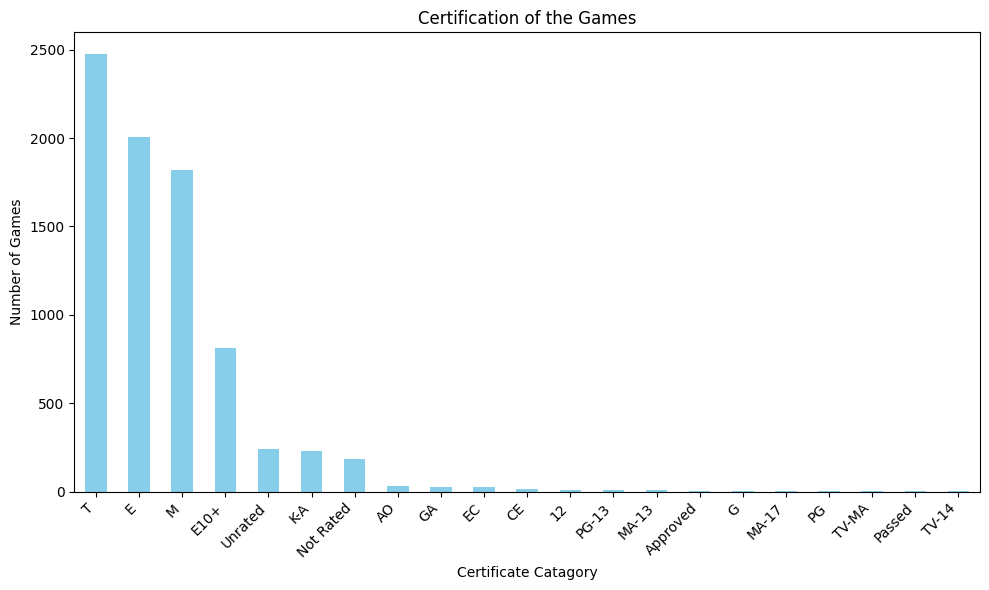

In [28]:

genre_distribution = df['certificate'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='skyblue')
plt.title('Certification of the Games')
plt.xlabel('Certificate Catagory')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


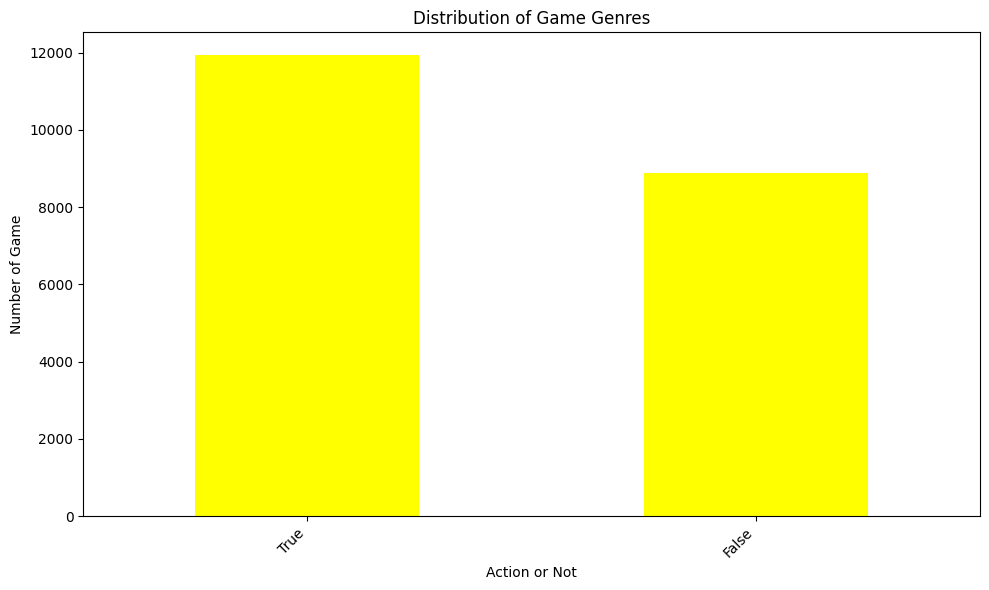

In [ ]:
genre_distribution = df['Action'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='Yellow')
plt.title('Distribution of Game Genres')
plt.xlabel('Action or Not')
plt.ylabel('Number of Game')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

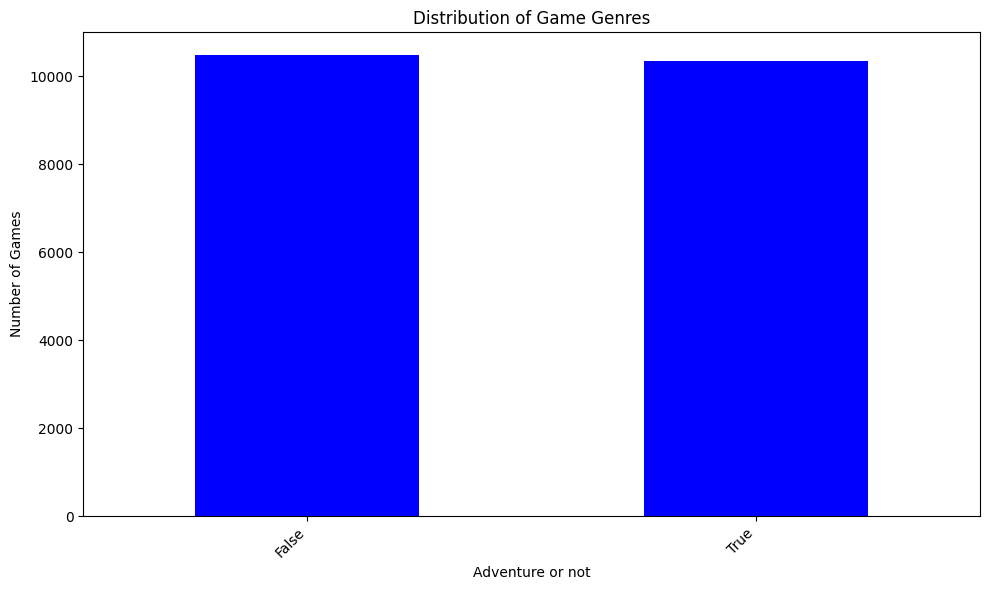

In [ ]:
genre_distribution = df['Adventure'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Game Genres')
plt.xlabel('Adventure or not')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

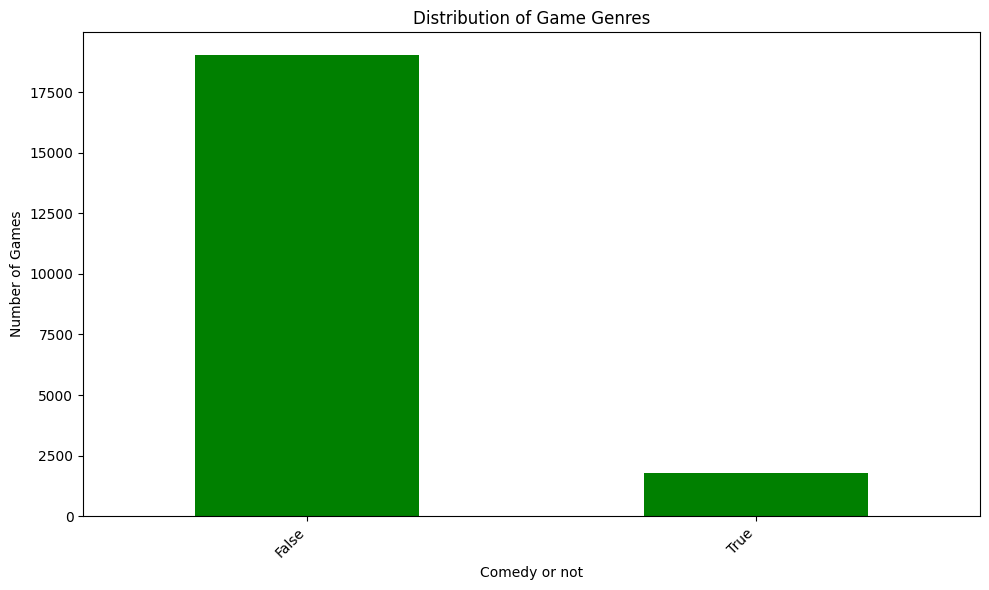

In [ ]:
genre_distribution = df['Comedy'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='Green')
plt.title('Distribution of Game Genres')
plt.xlabel('Comedy or not')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

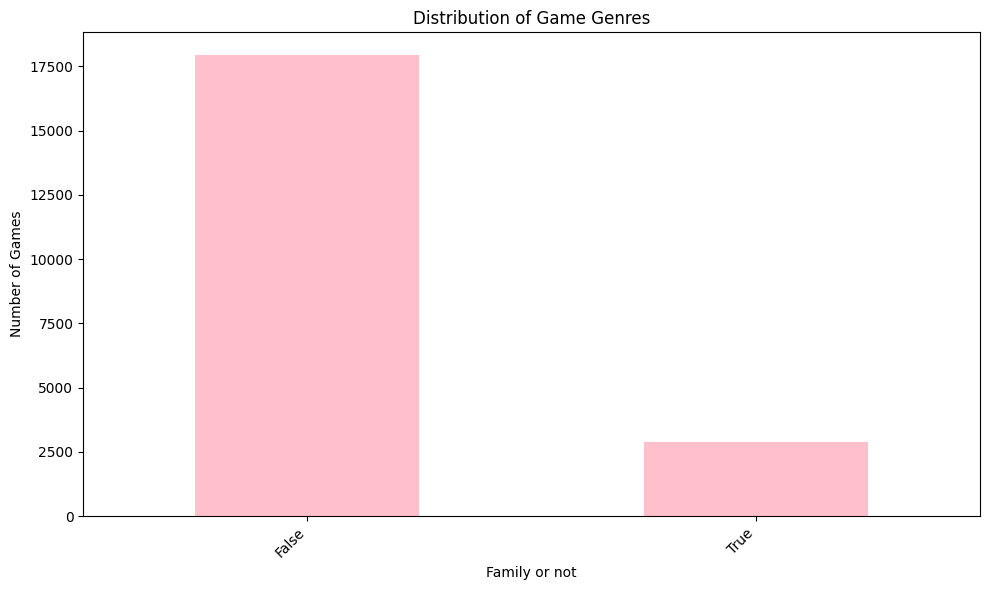

In [ ]:
genre_distribution = df['Family'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='pink')
plt.title('Distribution of Game Genres')
plt.xlabel('Family or not')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

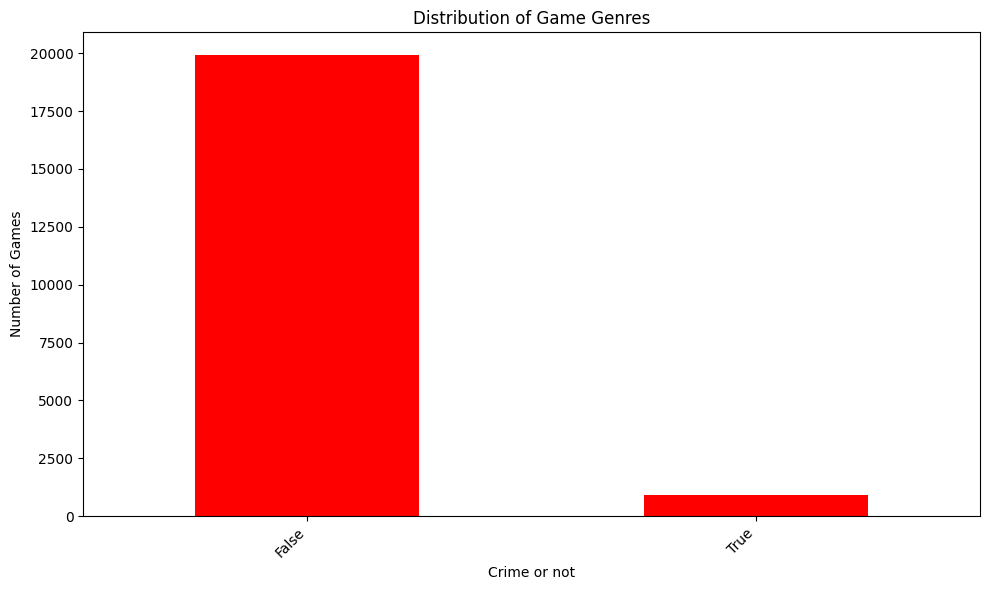

In [ ]:
genre_distribution = df['Crime'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='Red')
plt.title('Distribution of Game Genres')
plt.xlabel('Crime or not')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

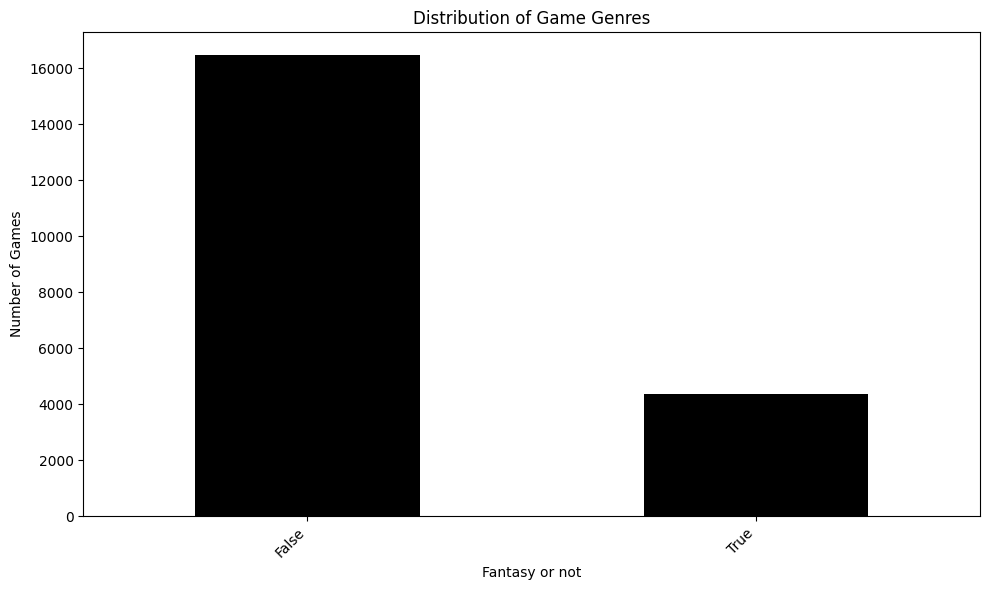

In [ ]:
genre_distribution = df['Fantasy'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='black')
plt.title('Distribution of Game Genres')
plt.xlabel('Fantasy or not')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

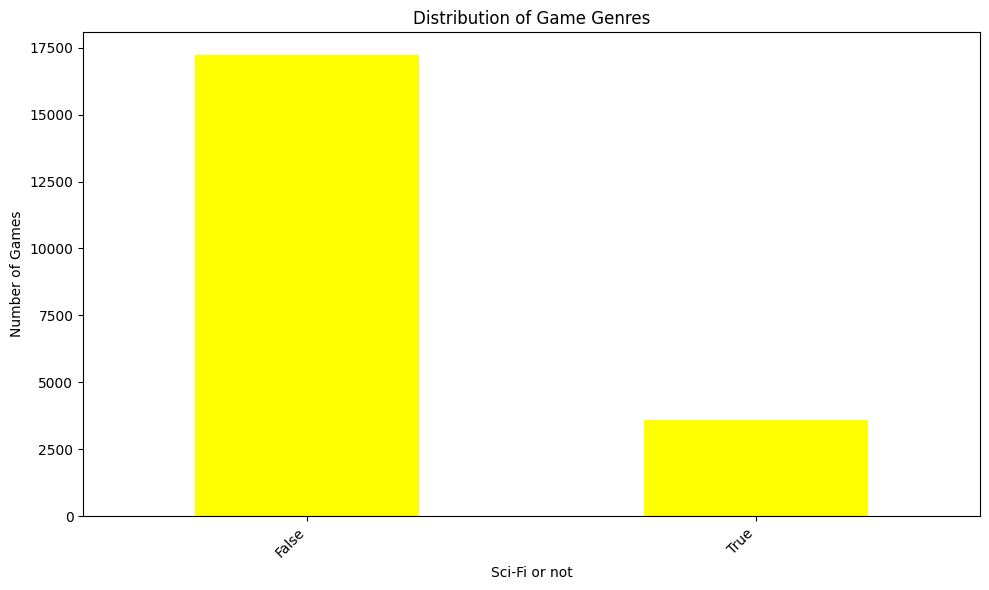

In [ ]:
genre_distribution = df['Sci-Fi'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='yellow')
plt.title('Distribution of Game Genres')
plt.xlabel('Sci-Fi or not')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

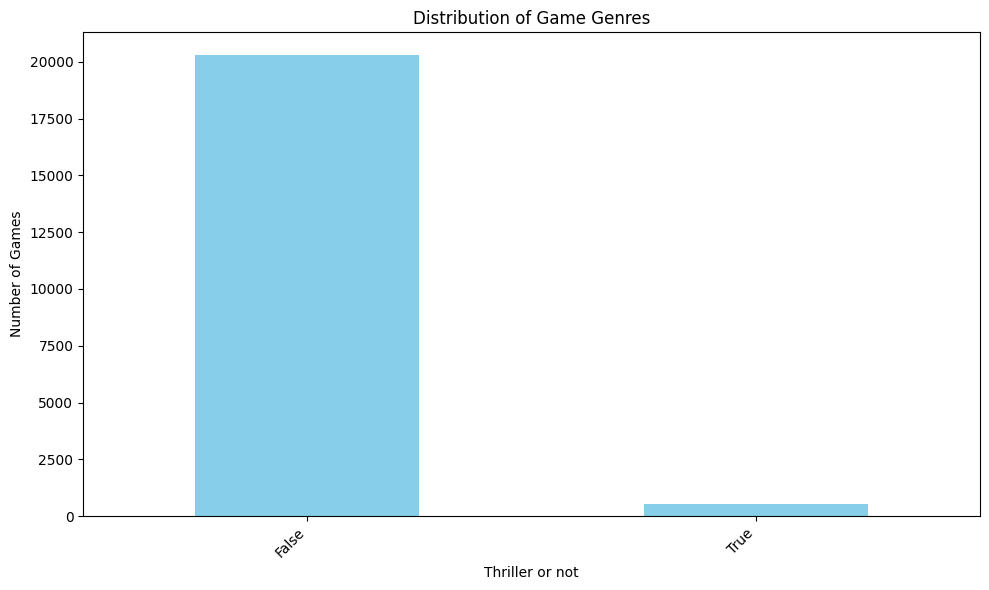

In [ ]:
genre_distribution = df['Thriller'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Game Genres')
plt.xlabel('Thriller or not')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()